## Geographycal and Seasonal Marketing Insights
 

 # 1.Project Objectives Summary
The goal of this analysis is to uncover geographical and seasonal patterns in movie box office performance to support strategic decision-making for film releases.

Key Objectives:

1. Compare domestic vs. international box office revenues to identify films with global or regional appeal.

2. Determine the best-performing release months and seasons based on historical revenue trends.

3. Spot seasonal trends to guide future movie release schedules for maximum profitability.

# 2. Data Analysis

This will be considerd a success when we are  able to effectively determined the movie company to purchase and start this new business

In [57]:
# Run this cell without changes
import pandas as pd                  
import numpy as np                   
import sqlite3                       
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# 3. Data Reading

In [11]:
# loading the data set
import sqlite3
import pandas as pd

# Connect to the IMDB database
conn = sqlite3.connect('im.db')

# Check available tables
tables = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", conn)
print(tables)


    type           name       tbl_name  rootpage  \
0  table   movie_basics   movie_basics         2   
1  table      directors      directors         3   
2  table      known_for      known_for         4   
3  table     movie_akas     movie_akas         5   
4  table  movie_ratings  movie_ratings         6   
5  table        persons        persons         7   
6  table     principals     principals         8   
7  table        writers        writers         9   

                                                 sql  
0  CREATE TABLE "movie_basics" (\n"movie_id" TEXT...  
1  CREATE TABLE "directors" (\n"movie_id" TEXT,\n...  
2  CREATE TABLE "known_for" (\n"person_id" TEXT,\...  
3  CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\...  
4  CREATE TABLE "movie_ratings" (\n"movie_id" TEX...  
5  CREATE TABLE "persons" (\n"person_id" TEXT,\n ...  
6  CREATE TABLE "principals" (\n"movie_id" TEXT,\...  
7  CREATE TABLE "writers" (\n"movie_id" TEXT,\n  ...  


In [58]:
# loading the data set
import sqlite3
import pandas as pd
pd.read_sql_query("SELECT * FROM movie_basics LIMIT 5;", conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
pd.read_sql_query("SELECT * FROM  directors LIMIT 5;", conn)


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [15]:
pd.read_sql_query("SELECT * FROM known_for LIMIT 5;", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [16]:
pd.read_sql_query("SELECT * FROM movie_ratings  LIMIT 5;", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
pd.read_sql_query("SELECT * FROM  movie_akas   LIMIT 5;", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [18]:
pd.read_sql_query("SELECT * FROM  writers   LIMIT 5;", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [19]:
pd.read_sql_query("SELECT * FROM   principals  LIMIT 5;", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [20]:
pd.read_sql_query("SELECT * FROM   persons  LIMIT 5;", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


In [63]:
bom = pd.read_csv("bom.movie_gross.csv")
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# 3. checking the data

In [22]:
# checking data
print(bom.head(5))

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [23]:
# checking unique values
bom.isnull


<bound method DataFrame.isnull of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

In [64]:
# identifying the missing data
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [66]:
release_dates = pd.read_sql_query("SELECT primary_title, start_year FROM movie_basics", conn)


In [68]:
merged_df = pd.merge(
    bom, 
    release_dates, 
    left_on='title', 
    right_on='primary_title', 
    how='inner'
)
merged_df.head()


,title,studio,domestic_gross,foreign_gross,year,primary_title,start_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,2010
1,Inception,WB,292600000.0,535700000,2010,Inception,2010
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,2010
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,2010
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,2010


In [27]:
summary_by_decade = merged_df.groupby('release_decade')[['domestic_gross', 'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False)
print(summary_by_decade)


                domestic_gross  \
release_decade                   
2010              9.981075e+10   
2020              7.690000e+04   

                                                    foreign_gross  
release_decade                                                     
2010            6520000005357000005139000003980000003115000003...  
2020                                                            0  


In [28]:
gross_by_year = merged_df.groupby('start_year')[['domestic_gross', 'foreign_gross']].sum().reset_index()
gross_by_year.head()


,start_year,domestic_gross,foreign_gross
0,2010,1.056577e+10,6520000005357000005139000003980000003115000003...
1,2011,1.139580e+10,9430000018100000690000055000008930001530077140...
2,2012,1.039724e+10,1086000006180000069000007700000770000039300052...
3,2013,1.121305e+10,2164000008620000058000008600000290000040000001...
4,2014,1.073800e+10,1086000001086000001086000005110000016500000181...


# 4. Data Visualisation

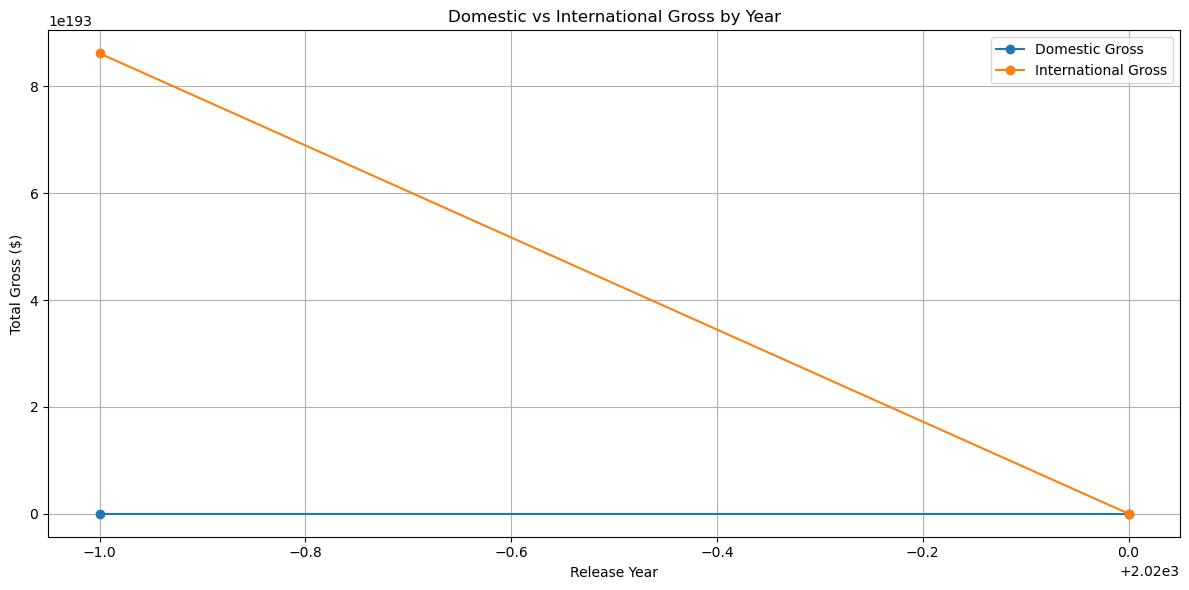

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(gross_by_year['start_year'], gross_by_year['domestic_gross'], label='Domestic Gross', marker='o')
plt.plot(gross_by_year['start_year'], gross_by_year['foreign_gross'], label='International Gross', marker='o')

plt.title('Domestic vs International Gross by Year')
plt.xlabel('Release Year')
plt.ylabel('Total Gross ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Show datatypes of each column
print(gross_by_year.dtypes)

# Show first few rows of the DataFrame
print(gross_by_year.head())

# Check what types are inside the 'foreign_gross' column
print(gross_by_year['foreign_gross'].apply(type).value_counts())


start_year          int64
domestic_gross    float64
foreign_gross      object
dtype: object
   start_year  domestic_gross  \
0        2010    1.056577e+10   
1        2011    1.139580e+10   
2        2012    1.039724e+10   
3        2013    1.121305e+10   
4        2014    1.073800e+10   

                                       foreign_gross  
0  6520000005357000005139000003980000003115000003...  
1  9430000018100000690000055000008930001530077140...  
2  1086000006180000069000007700000770000039300052...  
3  2164000008620000058000008600000290000040000001...  
4  1086000001086000001086000005110000016500000181...  
foreign_gross
<class 'str'>    10
<class 'int'>     1
Name: count, dtype: int64


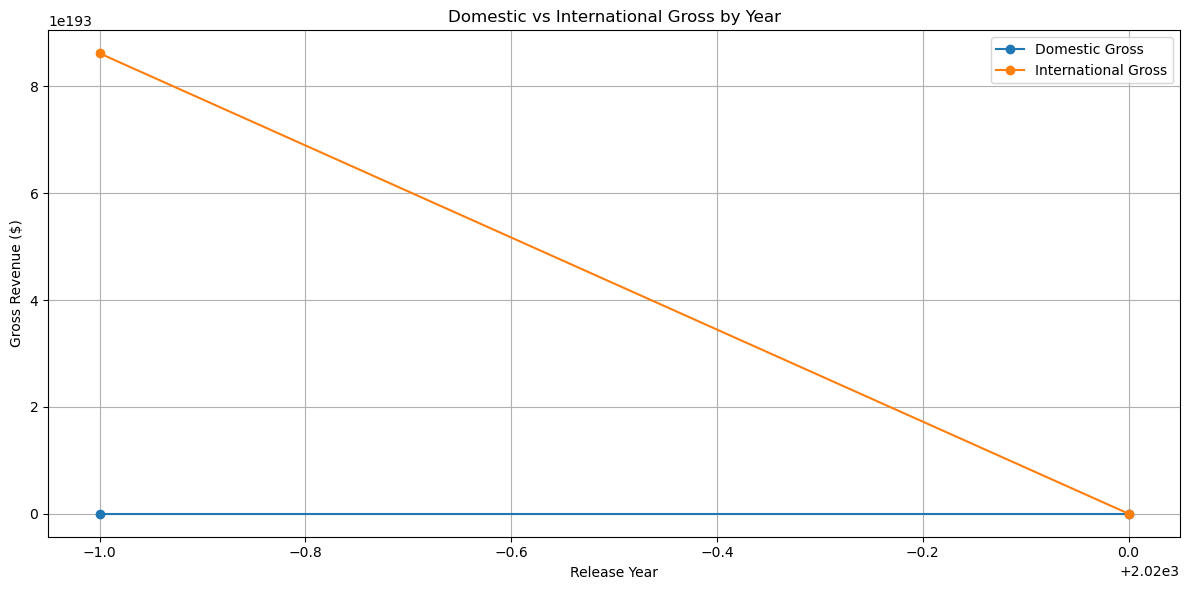

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean up the data just to be sure
gross_by_year['start_year'] = pd.to_numeric(gross_by_year['start_year'], errors='coerce')
gross_by_year['domestic_gross'] = pd.to_numeric(gross_by_year['domestic_gross'], errors='coerce')
gross_by_year['foreign_gross'] = pd.to_numeric(gross_by_year['foreign_gross'], errors='coerce')

# Drop any rows with missing values
gross_by_year.dropna(subset=['start_year', 'domestic_gross', 'foreign_gross'], inplace=True)

# Plot the graph
plt.figure(figsize=(12,6))
plt.plot(gross_by_year['start_year'], gross_by_year['domestic_gross'], label='Domestic Gross', marker='o')
plt.plot(gross_by_year['start_year'], gross_by_year['foreign_gross'], label='International Gross', marker='o')

# Add titles and labels
plt.title('Domestic vs International Gross by Year')
plt.xlabel('Release Year')
plt.ylabel('Gross Revenue ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
print(gross_by_year.dtypes)


start_year          int64
domestic_gross    float64
foreign_gross     float64
dtype: object


In [33]:
print(gross_by_year.head())
print(gross_by_year.isnull().sum())


    start_year  domestic_gross  foreign_gross
9         2019     669320300.0  8.620000e+193
10        2020         76900.0   0.000000e+00
start_year        0
domestic_gross    0
foreign_gross     0
dtype: int64


In [34]:
tmdb = pd.read_csv("tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [75]:
import pandas as pd

# Load tmdb.movies.csv with parsed dates
tmdb = pd.read_csv('tmdb.movies.csv', parse_dates=['release_date'])

# Extract release_month and release_season
tmdb['release_month'] = tmdb['release_date'].dt.month
tmdb['release_season'] = tmdb['release_month'].map({
    12:'Winter', 1:'Winter', 2:'Winter',
    3:'Spring', 4:'Spring', 5:'Spring',
    6:'Summer', 7:'Summer', 8:'Summer',
    9:'Fall', 10:'Fall', 11:'Fall'
})

# Check tmdb sample
print(tmdb[['title', 'release_date', 'release_month', 'release_season']].head())


                                          title release_date  release_month  \
0  Harry Potter and the Deathly Hallows: Part 1   2010-11-19             11   
1                      How to Train Your Dragon   2010-03-26              3   
2                                    Iron Man 2   2010-05-07              5   
3                                     Toy Story   1995-11-22             11   
4                                     Inception   2010-07-16              7   

  release_season  
0           Fall  
1         Spring  
2         Spring  
3           Fall  
4         Summer  


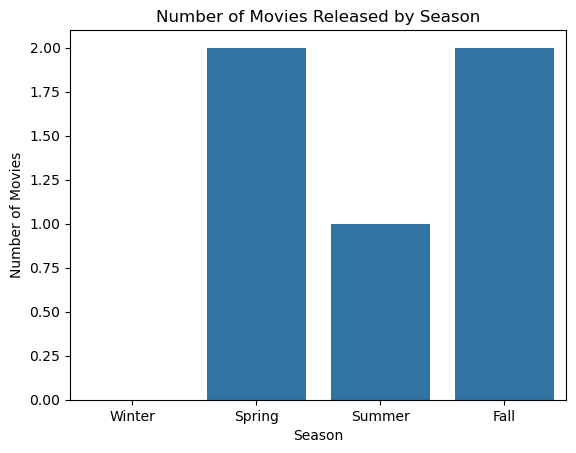

In [104]:
# Number of Movies Released by Season
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (from your table)
data = {
    'title': [
        'Harry Potter and the Deathly Hallows: Part 1',
        'How to Train Your Dragon',
        'Iron Man 2',
        'Toy Story',
        'Inception'
    ],
    'release_date': ['2010-11-19', '2010-03-26', '2010-05-07', '1995-11-22', '2010-07-16'],
    'release_month': [11, 3, 5, 11, 7],
    'release_season': ['Fall', 'Spring', 'Spring', 'Fall', 'Summer']
}

# Create DataFrame
movies_df = pd.DataFrame(data)

# Countplot for number of movies per season
sns.countplot(x='release_season', data=movies_df, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Number of Movies Released by Season')
plt.xlabel('Season')
plt.ylabel('Number of Movies')
plt.show()


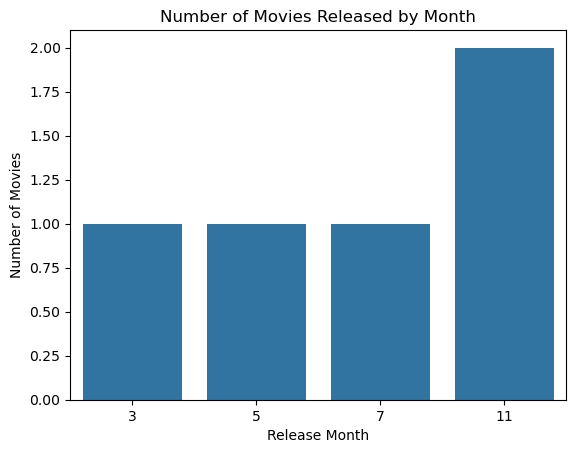

In [105]:
# Number of Movies Released by Month
# Countplot for number of movies per month
sns.countplot(x='release_month', data=movies_df)
plt.title('Number of Movies Released by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.show()


In [36]:
# Assuming merged_df has 'title' and 'domestic_gross'
df = pd.merge(merged_df, tmdb[['title', 'release_month', 'release_season']], on='title', how='inner')

# Group by release_month
monthly_gross = df.groupby('release_month')['domestic_gross'].sum().sort_values(ascending=False)
print("Top performing months:\n", monthly_gross)

# Group by release_season
seasonal_gross = df.groupby('release_season')['domestic_gross'].sum().sort_values(ascending=False)
print("\nTop performing seasons:\n", seasonal_gross)


Top performing months:
 release_month
12    1.777724e+10
11    1.773662e+10
6     1.591535e+10
5     1.199657e+10
9     1.190025e+10
7     1.011784e+10
2     7.731032e+09
8     7.478760e+09
3     7.164913e+09
1     6.989742e+09
4     6.977967e+09
10    6.001452e+09
Name: domestic_gross, dtype: float64

Top performing seasons:
 release_season
Fall      3.563832e+10
Summer    3.351195e+10
Winter    3.249801e+10
Spring    2.613945e+10
Name: domestic_gross, dtype: float64


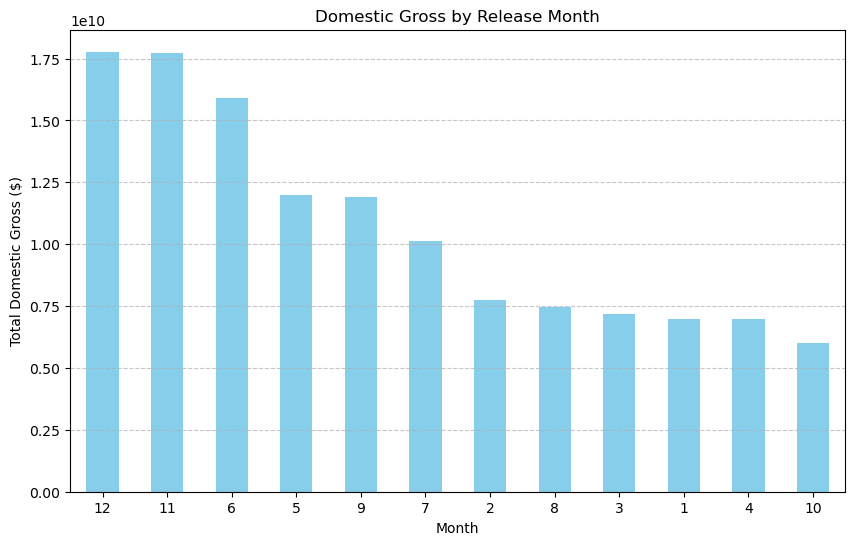

In [107]:
import matplotlib.pyplot as plt

# Bar chart for Domestic Gross by Release Month
plt.figure(figsize=(10,6))
monthly_gross.plot(kind='bar', color='skyblue')
plt.title('Domestic Gross by Release Month')
plt.xlabel('Month')
plt.ylabel('Total Domestic Gross ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


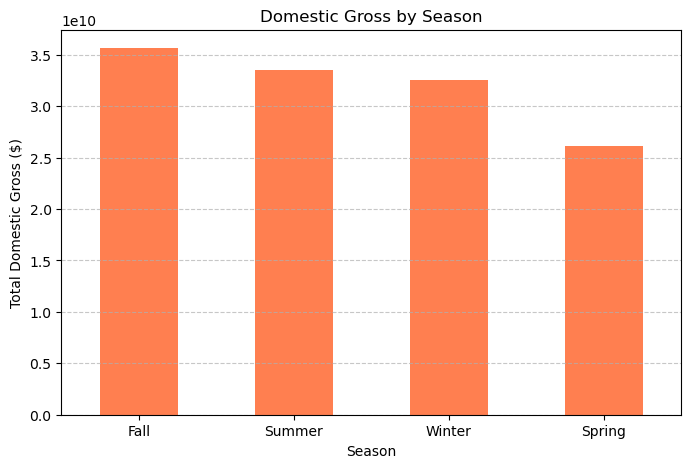

In [77]:
# Bar chart for Domestic Gross by Season
plt.figure(figsize=(8,5))
seasonal_gross.plot(kind='bar', color='coral')
plt.title('Domestic Gross by Season')
plt.xlabel('Season')
plt.ylabel('Total Domestic Gross ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Group by release_month for both domestic and international gross
gross_by_month = df.groupby('release_month')[['domestic_gross', 'foreign_gross']].sum()

# Sort months in order (just in case)
gross_by_month = gross_by_month.sort_index()

# Set up positions for bars
months = gross_by_month.index
x = np.arange(len(months))  # label locations
width = 0.35  # width of bars

# Create bar chart
plt.figure(figsize=(200,100))
plt.bar(x - width/2, gross_by_month['domestic_gross'], width, label='Domestic Gross', color='skyblue')
plt.bar(x + width/2, gross_by_month['foreign_gross'], width, label='International Gross', color='salmon')

# Add labels, title, grid, legend
plt.xlabel('Release Month')
plt.ylabel('Total Gross ($)')
plt.title('Domestic vs International Gross by Release Month')
plt.xticks(x, months)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [78]:
import sqlite3
import pandas as pd

# Connect to the SQLite database file
conn = sqlite3.connect('im.db')

# Load the 'directors' table into a DataFrame
directors = pd.read_sql_query("SELECT * FROM directors", conn)

# Load the 'persons' table into a DataFrame
persons = pd.read_sql_query("SELECT * FROM persons", conn)


# Load the 'movie_basics' table into a DataFrame
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Load the 'movie_ratings' table into a DataFrame
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Load the 'movie_ratings' table into a DataFrame
movie_akas = pd.read_sql_query("SELECT * FROM movie_akas", conn)

# Load the 'movie_ratings' table into a DataFrame
known_for = pd.read_sql_query("SELECT * FROM known_for", conn)

# Load the 'movie_ratings' table into a DataFrame
writers = pd.read_sql_query("SELECT * FROM writers", conn)
# Close the connection when done
conn.close()


In [95]:
directors_named = pd.merge(directors, persons, on='person_id', how='left')
directors_movies = pd.merge(directors_named, movie_basics, on='movie_id', how='left')
final_df = pd.merge(directors_movies, movie_ratings, on='movie_id', how='left')

In [96]:
# Print dataframes
print(final_df.head())
print(final_df.info())

# Drop any duplicates if necessary
final_df.drop_duplicates(inplace=True)


    movie_id  person_id       primary_name  birth_year  death_year  \
0  tt0285252  nm0899854        Tony Vitale      1964.0         NaN   
1  tt0462036  nm1940585         Bill Haley         NaN         NaN   
2  tt0835418  nm0151540  Jay Chandrasekhar      1968.0         NaN   
3  tt0835418  nm0151540  Jay Chandrasekhar      1968.0         NaN   
4  tt0878654  nm0089502        Albert Pyun      1954.0         NaN   

         primary_profession                    primary_title  \
0  producer,director,writer                   Life's a Beach   
1  director,writer,producer  Steve Phoenix: The Untold Story   
2     director,actor,writer                   The Babymakers   
3     director,actor,writer                   The Babymakers   
4  director,writer,producer                       Bulletface   

                    original_title  start_year  runtime_minutes    genres  \
0                   Life's a Beach        2012            100.0    Comedy   
1  Steve Phoenix: The Untold Story      

In [84]:
top_directors = final_df['primary_name'].value_counts().head(10)
print(top_directors)


primary_name
Omer Pasha          62
Larry Rosen         53
Rajiv Chilaka       49
Stephan Düfel       48
Graeme Duane        45
Gérard Courant      44
Claudio Costa       42
Nayato Fio Nuala    41
Sergey A.           39
Dustin Ferguson     39
Name: count, dtype: int64


In [85]:
ratings_per_director = final_df.groupby('primary_name')['averagerating'].agg(['mean', 'count']).reset_index()
ratings_per_director = ratings_per_director[ratings_per_director['count'] >= 2]
ratings_per_director = ratings_per_director.sort_values(by='mean', ascending=False)

print(ratings_per_director.head(10))


            primary_name      mean  count
102918  Vyacheslav Bihun  9.600000      2
96915      Taylor Morden  9.600000      2
20674     D. Todd Deeken  9.500000      2
20287    Cristina Duarte  9.250000      2
43946     Javier Pistani  9.250000      2
73082       Neven Hitrec  9.250000      2
31025             Fan Li  9.233333      3
49234      Jonathon Link  9.200000      2
1496        Aghora Vidya  9.200000      2
11699       Beto Ribeiro  9.166667      3


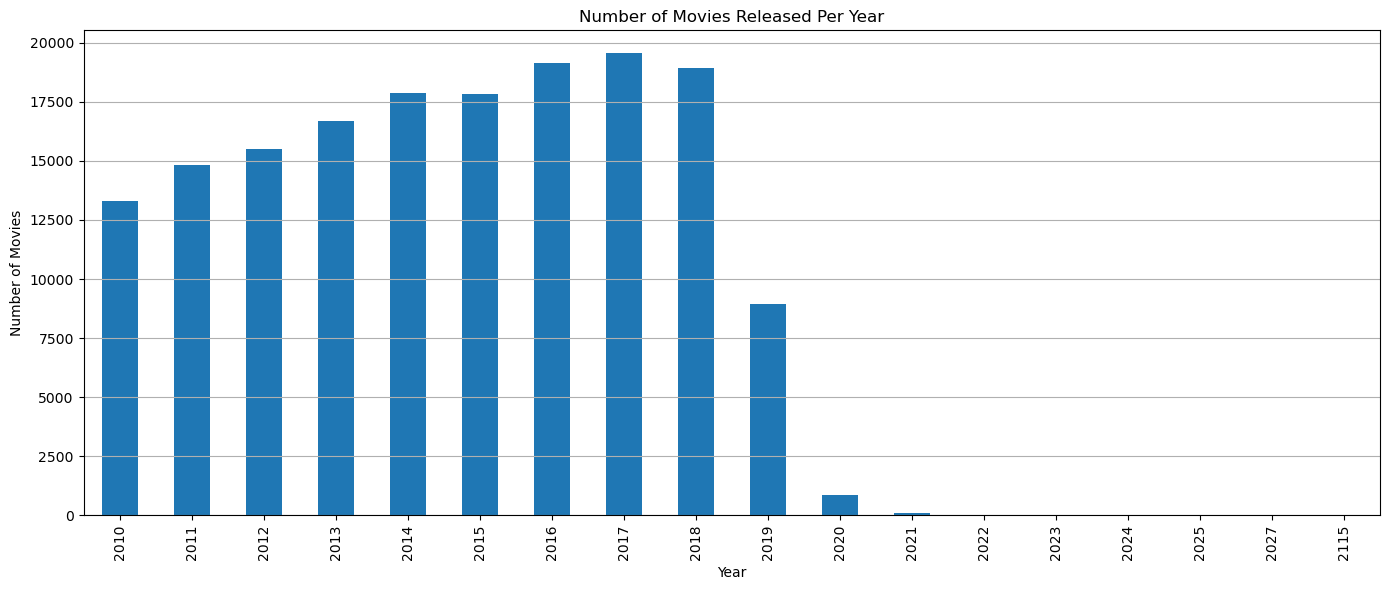

In [86]:
movies_per_year = final_df['start_year'].value_counts().sort_index()

movies_per_year.plot(kind='bar', figsize=(14,6))
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [87]:
from collections import Counter

genres_series = final_df['genres'].dropna().str.split(',')
all_genres = [genre for sublist in genres_series for genre in sublist]
genre_counts = Counter(all_genres)

# Top 10
print(genre_counts.most_common(10))


[('Documentary', 60205), ('Drama', 55707), ('Comedy', 29310), ('Horror', 13707), ('Thriller', 12981), ('Action', 11524), ('Romance', 10173), ('Biography', 10103), ('Adventure', 7564), ('Crime', 7450)]


In [49]:
movie_basics['primary_title'] = movie_basics['primary_title'].str.strip()
movie_basics['start_year'] = movie_basics['start_year'].astype(int)


In [52]:
# Load the data
import sqlite3
import pandas as pd

conn = sqlite3.connect('im.db')
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
conn.close()


In [53]:
# Inspect the data
movie_basics.head()
movie_basics.tail()
movie_basics.sample(5)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
13138,tt1679174,Crossing Our Borders,Crossing Our Borders,2010,55.0,"Documentary,History,News"
24753,tt1995309,Marrying the Mafia 4: Family Ordeal,Gamunui yeonggwang 4: Gamunui Soonan,2011,NaN,"Action,Comedy"
31018,tt2179171,Calling All Earthlings,Calling All Earthlings,2018,74.0,"Documentary,History,Sci-Fi"
103822,tt6082614,Tiger Girl,Tiger Girl,2017,90.0,Action
53099,tt3130936,Martini Mom and Devil Spawn,Martini Mom and Devil Spawn,2012,NaN,Comedy


In [54]:
# check dimensions
movie_basics.shape


(146144, 6)

In [55]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('im.db')

# Check available tables
print(pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", conn))


    type           name       tbl_name  rootpage  \
0  table   movie_basics   movie_basics         2   
1  table      directors      directors         3   
2  table      known_for      known_for         4   
3  table     movie_akas     movie_akas         5   
4  table  movie_ratings  movie_ratings         6   
5  table        persons        persons         7   
6  table     principals     principals         8   
7  table        writers        writers         9   

                                                 sql  
0  CREATE TABLE "movie_basics" (\n"movie_id" TEXT...  
1  CREATE TABLE "directors" (\n"movie_id" TEXT,\n...  
2  CREATE TABLE "known_for" (\n"person_id" TEXT,\...  
3  CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\...  
4  CREATE TABLE "movie_ratings" (\n"movie_id" TEX...  
5  CREATE TABLE "persons" (\n"person_id" TEXT,\n ...  
6  CREATE TABLE "principals" (\n"movie_id" TEXT,\...  
7  CREATE TABLE "writers" (\n"movie_id" TEXT,\n  ...  


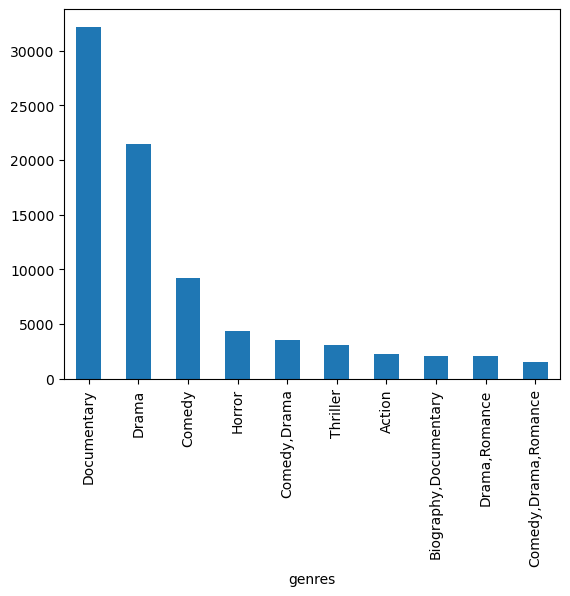

In [56]:
# categorical columns
movie_basics['genres'].value_counts().head(10).plot(kind='bar')
plt.show()


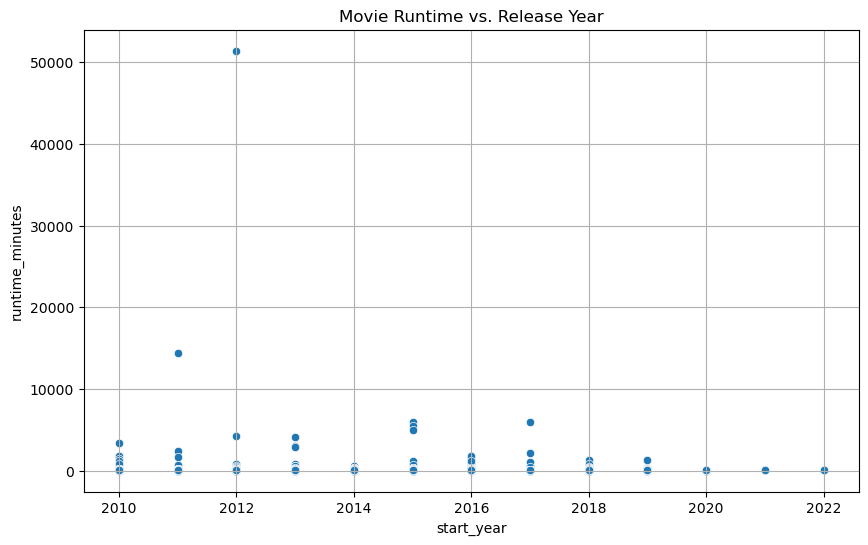

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='start_year', y='runtime_minutes', data=movie_basics)

# Add title and grid
plt.title('Movie Runtime vs. Release Year')
plt.grid(True)

# Show the plot
plt.show()


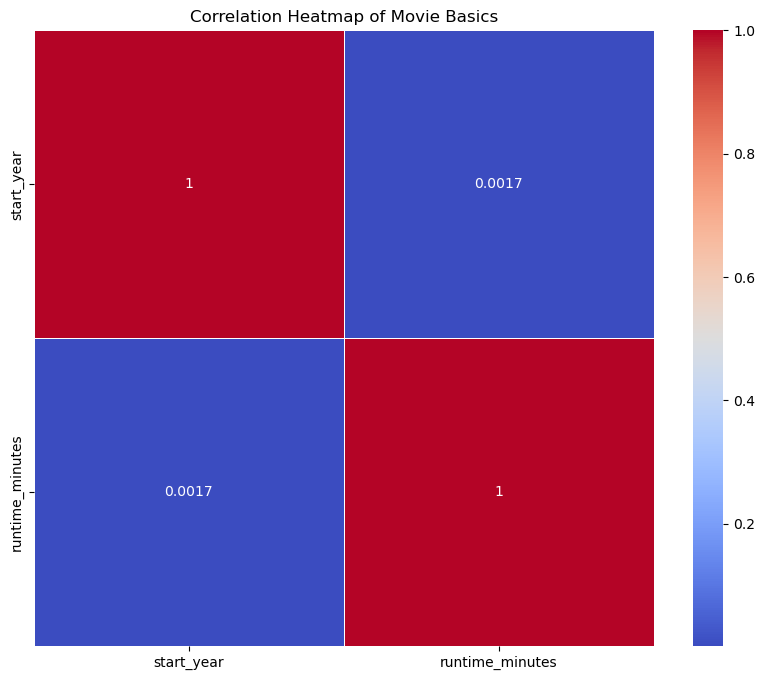

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = movie_basics.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Movie Basics')

# Show the plot
plt.show()
